<a href="https://colab.research.google.com/github/ovazque/ML/blob/main/LinearRegression_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear regression <br>
### Problem statement

The simplest linear model for regression is one that involves a linear combination of the input variables: <br>

<center>
$y(\mathbf{x,w}) = w_{0}+w_{1}x_{1}+...+w_{D}x_{D}$ <br>
</center>

where $\mathbf{x}=(x_{1},...,x_{D})^{\mathrm{T}}$. This is often simply known as *linear regression*. The key property of this model is that it is a linear function of the parameters $w_{0},...,w_{D}$. It is also, however, a linear function of the input variables $x_{i}$. <br>

The linearity on the input variables imposes significant limitations on the model. Therefore, it is convenient to extend the class of models by considering linear combinations of fixed nonlinear functions of the input variables, of the form:

<center>
$y(\mathbf{x,w}) = w_{0} + \sum_{j=1}^{M-1} w_{j}𝜙_{j}(\mathbf{x})$  <br>
</center>

where $𝜙_{j}(\mathbf{x})$ are nonlinear functions of the input variables known as *basis functions*. By denoting the maximum value of the index $j$ by $M-1$, the total number of parameters in this model will be $M$. <br>

The parameter $w_{0}$ is knows as the *intercept term*. It is often convenient to define and additional dummy  "basis function" $𝜙_{0}(\mathbf{x})=1$ so that <br>

<center>
$y(\mathbf{x,w}) = \sum_{j=0}^{M-1} w_{j}𝜙_{j}(\mathbf{x}) = \mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}) $  <br>
</center>

where $\mathbf{w}=(w_{0},...,w_{M-1})^{\mathrm{T}}$ and $𝝓=(𝜙_{0},...,𝜙_{M-1})^{\mathrm{T}}$. <br>

It is assumed that the target variable $t$ is given by a deterministic function $y(\mathbf{x,w})$ with additive Gaussian noise: $t=y(\mathbf{x,w})+𝜖$, where $𝜖$ is a zero mean Gaussian random variable with precission $\beta=1/𝜎^{2}$: <br>

<center>
$p(t|\mathbf{x,w},𝛽) = \mathcal{N}(t|y(\mathbf{x,w}),𝛽^{-1})$  <br>
</center>

Now let's consider a data set of inputs $\mathbf{X}=(\mathbf{x}_{1},...,\mathbf{x}_{N})$ with corresponding target values $t_{1},...,t_{N}$. Here $\mathbf{X}$ is a vector of $N$ observations and each observation $\mathbf{x}_{n}$ is a D-dimensional vector vector: $\mathbf{x}_{n} = (x_{1},,.,x_{D})$ being $x_{i}$ with $i=1,..,D$ the input variables. Similarly $\mathbf{t}=(t_{1},...,t_{N})$. <br>

Assuming that these data points are drawn independently form the Gaussian distribution, the likelihood function takes the form: <br>

<center>
$p(\mathbf{t}|\mathbf{x,w},𝛽) = \prod_{n=1}^{N} \mathcal{N}(t_{n}|\mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}_{n}),𝛽^{-1})$
</center>

Since one is not seeking to model the distribution of the input variables, $\mathbf{x}$ will always appear in the set of conditioning variables, and so from now on we will drop the explicit $\mathbf{x}$ from expressions such as $p(\mathbf{t}|\mathbf{x,w},𝛽)$ in order to keep the notation uncluttered.  

Using the univariate Gaussian distribution: $\mathcal{N}(t_{n}|\mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}_{n}),𝛽^{-1}) = \big(\frac{𝛽}{2π}\big)^{1/2} exp\big( -\frac{𝛽(t-\mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}_{n})^{2}}{2} \big)$, the logarithm of the Likelihood function takes the form: <br>

<center>
\begin{align}
\mathrm{ln}p(\mathbf{t}|\mathbf{w},𝛽) &= \mathrm{ln} \prod_{n=1}^{N} \mathcal{N}(t_{n}|\mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}_{n}),𝛽^{-1}) \\
& = \frac{N}{2}\mathrm{ln}𝛽 - \frac{N}{2}\mathrm{ln}(2π) - 𝛽E_{D}(\mathbf{w})
\end{align}
</center>

where the sum-of-squares error function is given by: <br>

<center>
$ E_{D}(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N}(t_{n}-\mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}_{n}))^{2}$
</center>

Having written down the likelihood function, one can use maximum likelihood to determine $\mathbf{w}$ and $𝛽$. Consider first the maximization with respect to $\mathbf{w}$. Maximization of the likelihood function under a conditional gaussian distribution for a linear model is equivalent to minimizing a sum-of-squares error function given by $ E_{D}(\mathbf{w})$.  The gradient of the log likelihood function takes the form:

<center>
$\nabla \mathrm{ln} p(\mathbf{t}|\mathbf{w},𝛽) = 𝛽\sum_{n=1}^{N}(t_{n} - \mathbf{w}^{\mathrm{T}}𝝓(\mathbf{x}_{n}))𝝓(\mathbf{x}_{n})^{\mathrm{T}}$
</center>

Setting this gradient to zero and solving for $\mathbf{w}$ one obtains:

<center>
$\mathbf{w}_{\mathrm{ML}} = (𝞍^{\mathrm{T}}𝞍)^{-1}𝞍^{\mathrm{T}}\mathbf{t}$
</center>

which are known the *normal equations* for the least squares problem. Here $𝞍$ is an $N\times M$ matrix, called the *design matrix*, whose elements are given by $𝞍_{n,j}=𝜙_{j}(\mathbf{x}_{n})$.

\begin{equation}
𝞍 = \begin{bmatrix} 𝜙_{0}(\mathbf{x}_{1}) & 𝜙_{1}(\mathbf{x}_{1}) & \dots  & 𝜙_{M-1}(\mathbf{x}_{1}) \\ 𝜙_{0}(\mathbf{x}_{2}) & 𝜙_{1}(\mathbf{x}_{2}) & \dots  & 𝜙_{M-1}(\mathbf{x}_{2}) \\ \vdots & \vdots & \ddots & \vdots \\ 𝜙_{0}(\mathbf{x}_{N}) & 𝜙_{1}(\mathbf{x}_{N}) & \dots & 𝜙_{M-1}(\mathbf{x}_{N})
\end{bmatrix}
\end{equation}

Each column represents a basis function $𝜙_{j}(\mathbf{x}_{n})$ ($j=0,...,M-1$) evaluated at the $\mathbf{x}_{n}$ $(n=1,...,N)$ observation. In the general case $\mathbf{x}_{n}$ is a $D$-dimensional vector and hence $𝜙_{j}(\mathbf{x}_{n})$ a multivariate function. In particular $𝜙_{0}(\mathbf{x}_{n}) = 1$.

# Application

Use the Linear regression model to predict the target variable $t$, which depends only on a single attribute variable $x$. This means that $\mathbf{X} = (\mathbf{x}_{1},..,\mathbf{x}_{N})^{\mathrm{T}}$ where $N$ is the total number of observations can be written as $\mathbf{X} = (x_{1},..,x_{N})^{\mathrm{T}}$ . Therefore, the functional form of the regression function is of the form: $y(x)= w_{0} + w_{1}x$.

In [64]:
import numpy as np

# X is a numpy array of shape (N,1) of generated pseudo random numbers using a uniform distribution between [0,1).
# Here  X represents the N observations of a single attribute: x
N=50
X = 2 * np.random.rand(N,1)

# y depends linearly on X. Each entry includes a random noise
# given by a univariate normal (Gaussian) distribution
# with mean = 0 and variance = 1.
y = 4 + 3 * X + np.random.randn(N,1)

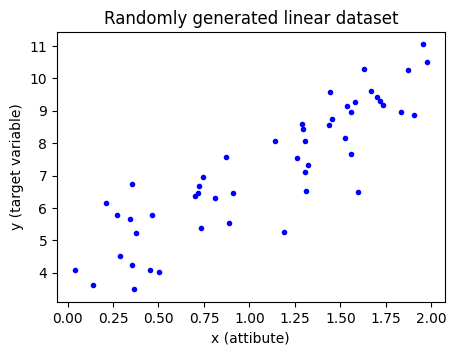

In [65]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3.5))
plt.title("Randomly generated linear dataset")
plt.xlabel("x (attibute)")
plt.ylabel("y (target variable)")
plt.plot(X,y,"b.")
plt.show()

First one has to calculate the *design matrix*, $𝞍_{nj}=𝜙_{j}(x_{n})$. For this particular example where $N=100$ observations and the model has only two parameters: $w_{0}$ and $w_{1}$, the design matrix has a dimension equal to $100\times2$. The first column of $𝞍_{nj}$ is equal to $1$ for all the $n$ values: $𝞍_{n1}=1$. The second column $𝞍_{n2}=𝜙_{2}(x_{n}) = x_{n}$, where $x_{n}$ represents each of the one hundred observations.

In [66]:
# X_b is a matrix of shape (N,2).
X_b = np.c_[np.ones((N,1)), X]

Let's compute $\mathbf{w}_{\mathrm{ML}}$ using the normal equations $(\mathbf{w}_{\mathrm{ML}} = (𝞍^{\mathrm{T}}𝞍)^{-1}𝞍^{\mathrm{T}}\mathbf{t})$:

In [67]:
w_ML = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [68]:
# The maximum likelihood estimate for the parameters w_{0} and w_{1}
w_ML

array([[3.89352724],
       [3.08224681]])

The maximum likelihood estimate yields $w_{0}= 3.762$ and $w_{1}=3.175$ instead of $w_{0}= 4$ and $w_{1}=3$. This is because the Gaussian noise made it impossible to recover the exact parameters of the original function.

Let's make some predictions using $x=0,0.1,0.8,1,1.3,1.6,1.9,2$:

In [69]:
X_new = np.array([[0],[0.1],[0.8],[1],[1.3],[1.6],[1.9],[2]])

In [70]:
X_new_b = np.c_[np.ones((8,1)), X_new]

In [71]:
X_new_b

array([[1. , 0. ],
       [1. , 0.1],
       [1. , 0.8],
       [1. , 1. ],
       [1. , 1.3],
       [1. , 1.6],
       [1. , 1.9],
       [1. , 2. ]])

$\mathbf{y}_{\mathrm{predict}}(x)= w_{0}+w_{1}x = \mathbf{x} \cdot \mathbf{w}_{\mathrm{ML}}$. Here $\mathbf{x}$ is the ```X_new_b``` matrix of shape (8,2) and $\mathbf{w}_{\mathrm{ML}} = (3.762,3.175)^{\mathrm{T}}$.

In [72]:
y_predict = X_new_b.dot(w_ML)

In [73]:
y_predict

array([[ 3.89352724],
       [ 4.20175192],
       [ 6.35932469],
       [ 6.97577406],
       [ 7.9004481 ],
       [ 8.82512214],
       [ 9.74979619],
       [10.05802087]])

In [74]:
w_true = [[4],[3]]
y_true = X_new_b.dot(w_true)

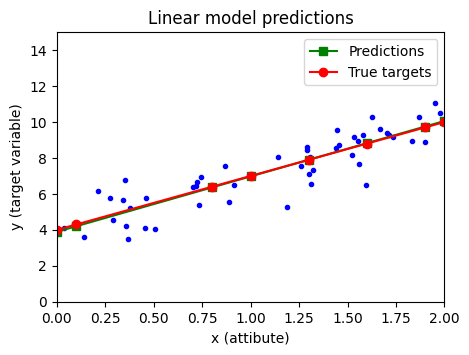

In [75]:
plt.figure(figsize=(5,3.5))
plt.title("Linear model predictions")
plt.xlabel("x (attibute)")
plt.ylabel("y (target variable)")
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, marker="s",label='Predictions', color="green")
plt.plot(X_new, y_true, marker="o",label='True targets', color="red")
plt.axis([0,2,0,15])
plt.legend()
plt.show()

# Linear regression unsing Scikit-Learn

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

As expected, one gets the same values for $w_{0}$ and $w_{1}$ as those calculated from the normal equations.

In [77]:
# Get the intercept w_{0} and the w_{1} coefficient
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  [3.89352724]
Coefficient:  [[3.08224681]]


In [79]:
lin_reg.predict(X_new)

array([[ 3.89352724],
       [ 4.20175192],
       [ 6.35932469],
       [ 6.97577406],
       [ 7.9004481 ],
       [ 8.82512214],
       [ 9.74979619],
       [10.05802087]])

In [80]:
y_predict

array([[ 3.89352724],
       [ 4.20175192],
       [ 6.35932469],
       [ 6.97577406],
       [ 7.9004481 ],
       [ 8.82512214],
       [ 9.74979619],
       [10.05802087]])

#Conclusion

The linear regression model works fine when the target variables are linear on the attribues. However, te computation of the normal equations involves the inverse of $𝞍^{\mathrm{T}}𝞍$, which is an $M\times M$ matrix. This can represent a computational callenge when $M$ is very large.